In [53]:
import requests
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [24]:
url = r'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz'
rep_input = Path('data')
rep_input.mkdir(parents=False, exist_ok=True)

In [33]:
def get_data(url, rep):
    # download data from url
    file_name = Path(url).name
    file_full_name = rep / file_name
    if not file_full_name.is_file():
        file = requests.get(url)
        open(rep / file_name, 'wb').write(file.content)
    else:
        print("already there!")
        
    if '.tgz' in file_full_name.suffixes:
        print("archive extraction...")
        file_tgz = tarfile.open(file_full_name)
        file_tgz.extractall(path=rep)
        file_tgz.close()
        print("archive extracted")

def load_housing_data(file_path):
    df = pd.read_csv(
        file_path
    )
    return df

In [34]:
get_data(url, rep_input)

already there!
archive extraction...
archive extracted


In [37]:
housing = load_housing_data(rep_input / 'housing.csv')

In [38]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [41]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


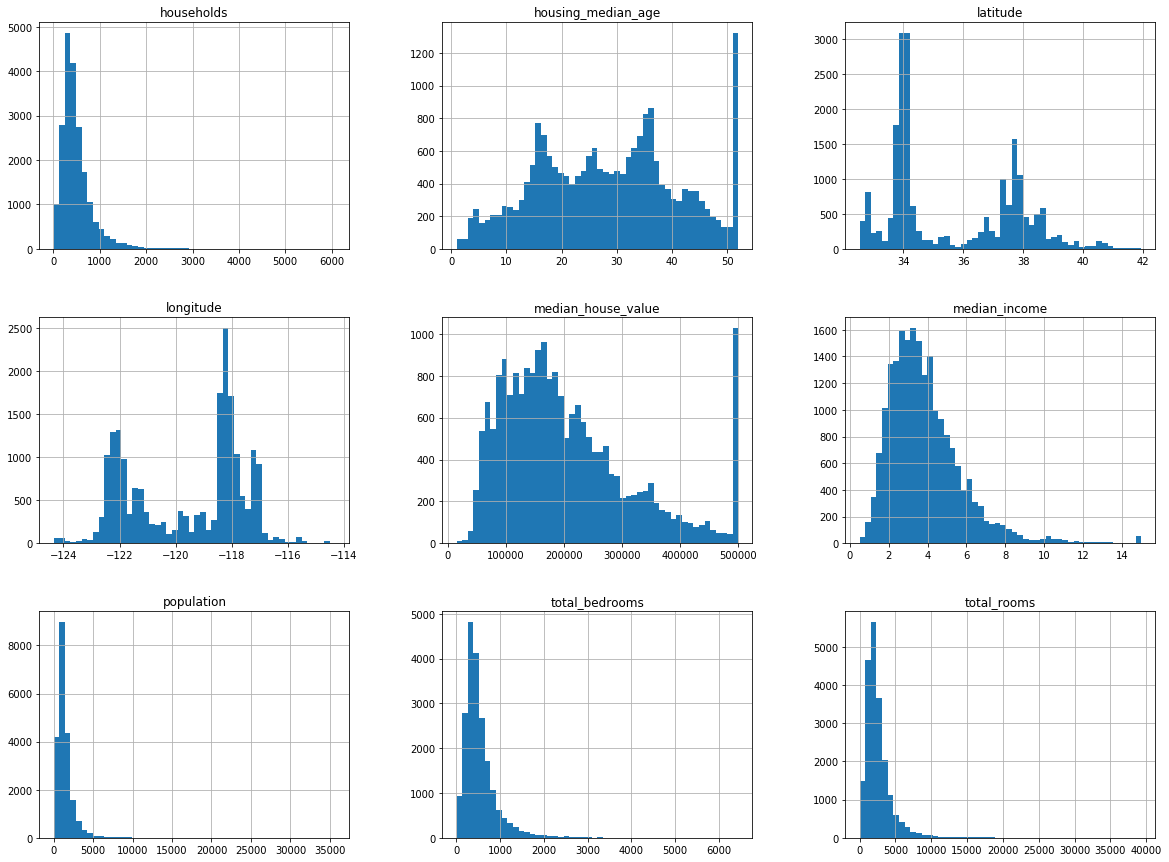

In [43]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [45]:
train_set, test_set = train_test_split(
    housing,
    test_size=.2,
    random_state=42
)

In [48]:
type(test_set)

pandas.core.frame.DataFrame

In [51]:
housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins=[0, 1.5, 3, 4.5, 6, np.inf],
    labels=[1, 2, 3, 4, 5]
)

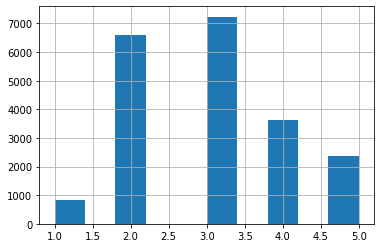

In [52]:
housing['income_cat'].hist()

In [54]:
# stratified sampling based on the income category
split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=.2,
    random_state=42
)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [57]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [58]:
housing = strat_train_set.copy()

No handles with labels found to put in legend.


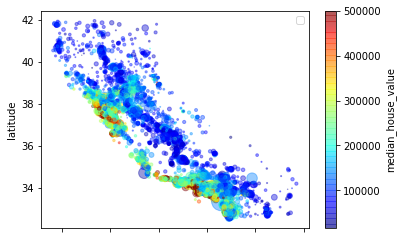

In [64]:
housing.plot(
    kind='scatter', x='longitude', y='latitude', alpha=.4,
    s=housing['population']/100,
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
)
plt.legend()